In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [5]:
# Read in the data
df = pd.read_csv('../Data/data_clean.csv',
                 parse_dates=['Date', 'Date of Birth'],
                 delimiter=';',
                 )

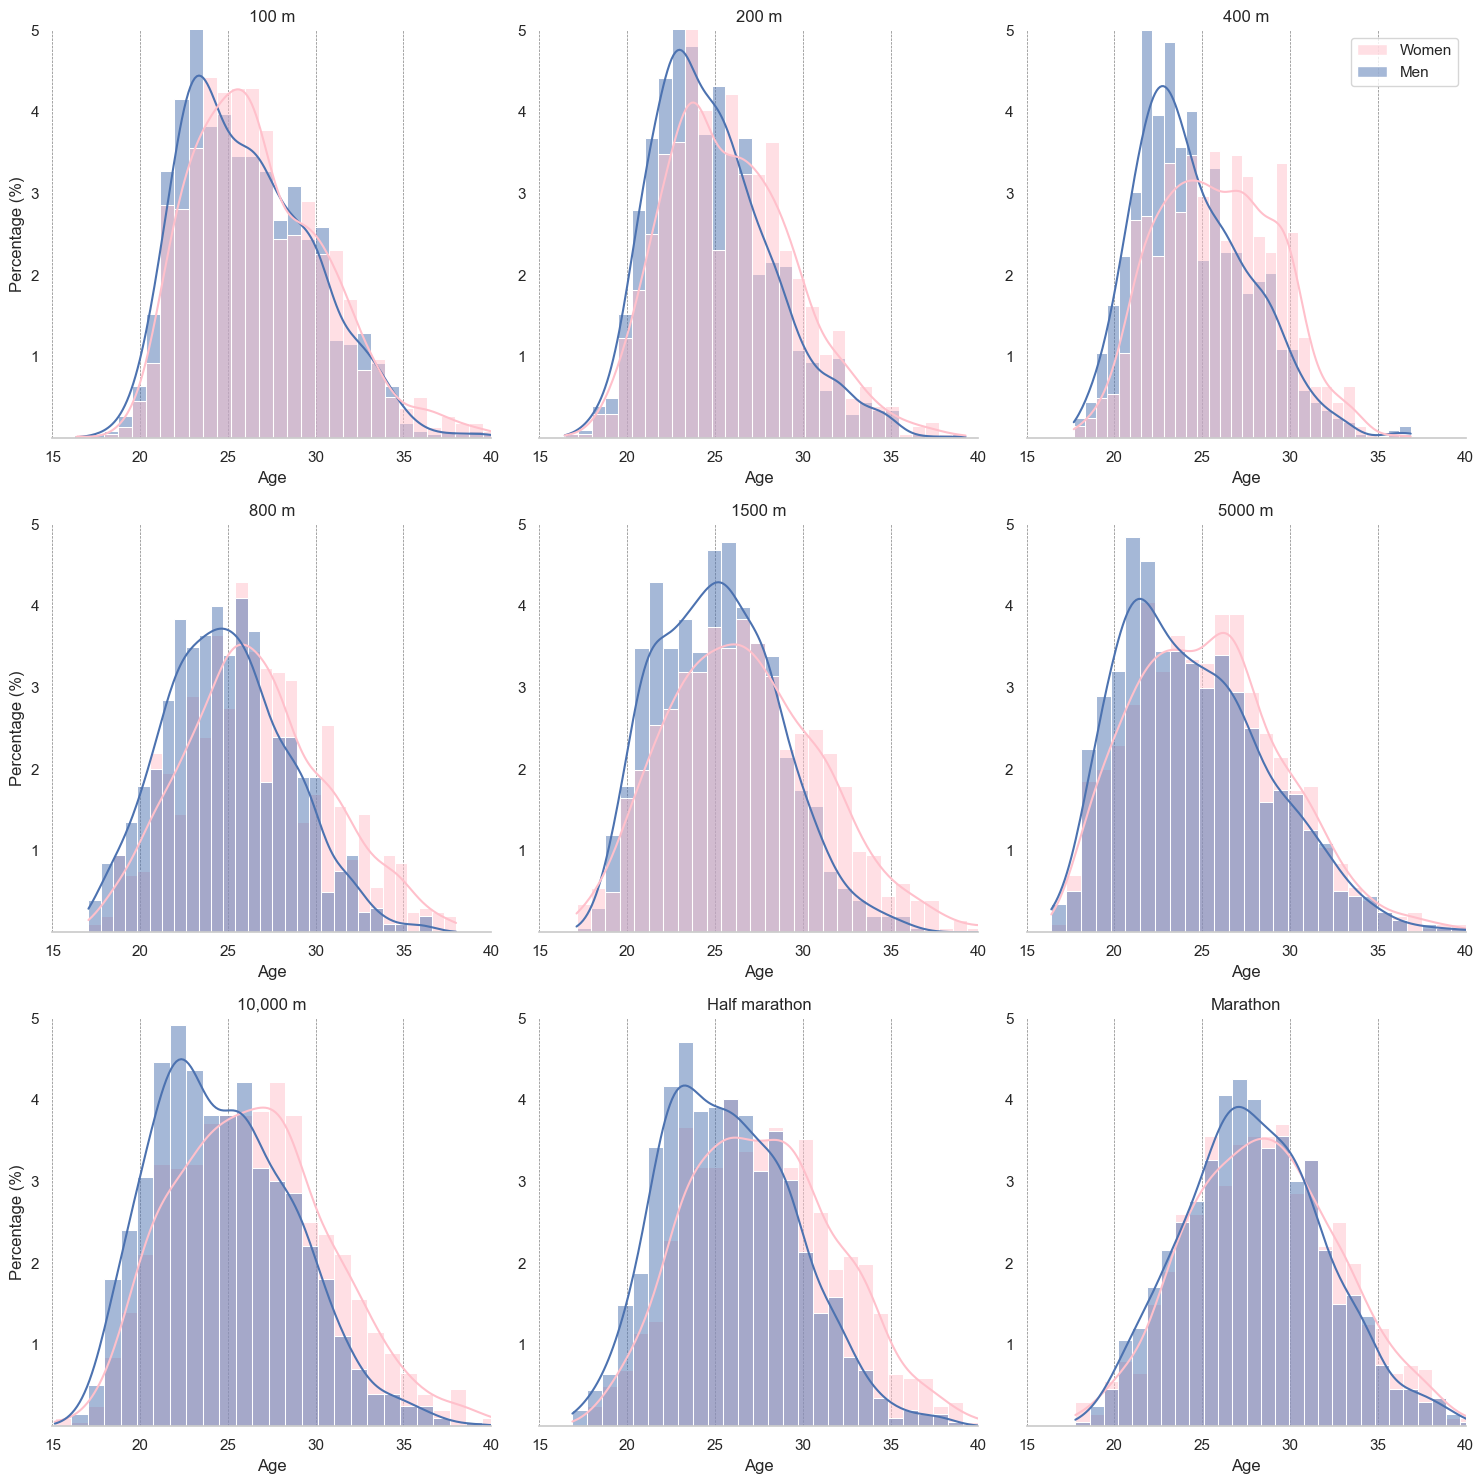

In [29]:
# List all unique events in the df
unique_events = df['Event'].unique()

# Set the style for the plots
sns.set(style="whitegrid")


# Filter and sort the events based on Olympic distances and half marathon
sorted_events = ['100 m', '200 m', '400 m', '800 m', '1500 m', '5000 m', '10,000 m', 'Half marathon', 'Marathon']

# Determine the number of rows and columns for the subplots
n = len(sorted_events)
ncols = 3  # Number of columns
nrows = math.ceil(n / ncols)  # Number of rows

# Create a figure and axes objects
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create subplots
for idx, event in enumerate(sorted_events):
    ax = axes[idx]
    sns.histplot(data=df[df['Event'] == event], x='Age', hue='Gender', bins=30, kde=True, stat='percent', palette={"Men": "b", "Women": "pink"}, ax=ax)
    ax.set_title(f'{event}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Percentage (%)')
    
    ax.set_xticks([15, 20, 25, 30, 35, 40])
    ax.set_xlim([15, 40])
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_ylim([0, 5])
    
    if idx % ncols != 0:
        ax.set_ylabel('')    
    
    # Remove spines
    sns.despine(left=True, top=True, right=True, ax=ax)
    ax.yaxis.set_ticks_position('none')
    
    # Remove horizontal grid lines
    ax.yaxis.grid(False)
    
    # Remove the legend for all but the plot in the first row rightmost column
    if idx != 2:
        ax.get_legend().remove()
    # Remove the legend title
    if ax.get_legend() is not None:
        ax.get_legend().set_title('')
        
    # Add subtle vertical grid
    ax.xaxis.grid(True, linestyle='--', linewidth=0.5, color='grey')

# Remove extra subplots if any
for idx in range(len(sorted_events), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


